## 데이터 처리 환경설정

In [11]:
import pandas as pd
import openpyxl
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import cv2


In [2]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기

개인정보 유출 때문에 개인 폴더에서 통일화 작업을 하고 불러옴

In [3]:
df_sam1 = pd.read_csv('./sample1.csv')
df_sam2 = pd.read_csv('./sample2.csv')

In [4]:
df_sam1.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,1,71,OD,2005-03-18 오후 12:57:56,NaN,2.8,5,41,1,14,5,3,-16.11,5,8.77,5,63,4,4,4,4,1,4,4,4,4,4,4,4,4,0,0,1,4,0,0,2,0,0,0,0,0,NaN,3,3,4,0,0,0,0,...,-10,-23,-30,-23,-33,-24,-31,-18,-17,-3,-9,-11,-28,-5,-5,-13,-5,-7,-7,-6,-9,NaN,-14,-13,-18,-10,-10,-7,-6,-15,NaN,-12,-7,-18,-19,-8,-12,-29,-31,-23,-21,-7,-31,-10,-21,-9,-16,-19,-18,-24
1,1,71,OS,2005-03-18 오후 1:08:41,NaN,0.0,5,24,1,13,4,3,-13.60,5,7.03,5,58,4,4,4,4,4,3,0,0,4,1,0,3,4,4,0,4,3,4,2,4,1,2,4,3,4,NaN,4,4,4,4,4,4,4,...,-26,-13,-3,-7,-21,-13,-3,-11,-15,-19,-9,-18,-17,-17,-12,-22,-11,-12,-19,-11,-17,NaN,-15,-14,-15,-15,-23,-13,-24,-32,NaN,-19,-15,-24,-19,-31,-3,-19,-17,-8,-11,-6,-16,-14,-8,-7,-1,-3,-3,-12


In [5]:
df_sam2.head()

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_26,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_35,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
0,264,26,OD,2008-11-26 오후 4:38:34,NaN,0.0,1,4,2,19,7,3,-4.46,4,6.73,5,91,0,0,0,0,0,1,4,0,0,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,NaN,4,0,0,0,1,1,0,...,0,-5,-14,0,-3,-4,-27,1,-1,-1,0,0,-3,-2,-4,-20,-4,-5,-5,-3,-2,NaN,-33,-3,-3,-3,-5,-6,-3,-3,NaN,-4,-4,-3,-1,-3,-2,-4,-3,-3,-2,-3,-3,-3,-4,-3,-2,-3,-2,-4
1,264,26,OS,2008-11-04 오후 4:14:53,NaN,0.0,0,0,0,21,8,3,-13.01,5,14.83,5,67,4,4,4,4,4,4,4,4,4,4,4,3,0,4,4,0,4,4,0,4,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-21,-31,-33,-35,-28,-27,-11,-29,-23,-3,-33,-33,-1,-12,-32,-4,-2,-4,-6,NaN,-31,-3,-2,-3,-31,-3,-4,-6,NaN,-5,-8,-5,-7,-7,-6,-3,-4,-3,-2,-3,-3,-3,1,-2,-5,-2,-2,-7
2,264,26,OD,2008-11-04 오후 4:05:13,NaN,0.0,1,0,0,19,7,3,-4.42,4,7.31,5,89,0,0,0,0,0,0,4,2,0,0,4,0,0,0,0,0,1,0,0,4,0,0,0,1,0,NaN,4,1,0,1,2,0,1,...,-3,0,-16,-8,-1,0,-14,-3,0,1,0,0,-5,-1,-3,-35,-2,-4,-3,-4,-3,NaN,-33,-4,-2,-4,-6,-5,-4,-6,NaN,-4,-4,-5,-3,-5,-3,-4,-4,-8,-5,-2,-2,-2,-7,-4,-2,-1,-2,-2
3,264,26,OS,2008-11-03 오후 4:40:56,NaN,0.0,0,6,0,20,8,3,-13.83,5,14.23,5,67,4,4,4,4,4,4,4,4,4,4,3,2,0,4,1,3,4,4,0,3,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-33,-34,-27,-31,-33,-35,-10,-18,-4,-31,-11,-18,-33,-33,-4,-9,-28,-6,-3,-5,-6,NaN,-33,-3,-4,-4,-21,-4,-5,-5,NaN,-5,-3,-5,-7,-4,-5,-8,-8,-12,-3,-3,-3,-4,-11,-8,-9,-6,-5,-6
4,264,26,OD,2008-11-03 오후 4:12:10,NaN,0.0,0,8,0,17,6,3,-7.88,5,8.42,5,85,0,0,0,0,0,0,0,0,4,4,1,0,4,4,4,0,0,1,0,0,4,0,0,0,0,NaN,4,0,0,0,4,0,0,...,-1,-4,-4,-3,-35,-19,-8,-5,-13,-19,-15,-6,-2,-7,-1,-3,-35,-4,-5,-5,-6,NaN,-33,-6,-4,-3,-12,-5,-6,-5,NaN,-7,-4,-4,-10,-5,-4,-9,-6,-3,-4,-3,-11,-3,-4,-7,-5,-5,-7,-8


In [6]:
# 같은 사람끼리 묶고, 날짜 시간별로 정렬
df_sam2 = df_sam2.sort_values(['PID', 'AGE']).copy()

In [7]:
# 검사 값들
check_list = ['PDP', 'PDV', 'THV', 'TDP', 'TDV']

## 데이터 이상치 시각화 후 확인
   * THV를 제외한 다른 분야에서는 26, 35번 데이터는 측정이 안되는 것을 확인 - 맹점
   * 특이 데이터가 조금 보이는 것 같으니 박사님께 여쭤보기


PDP


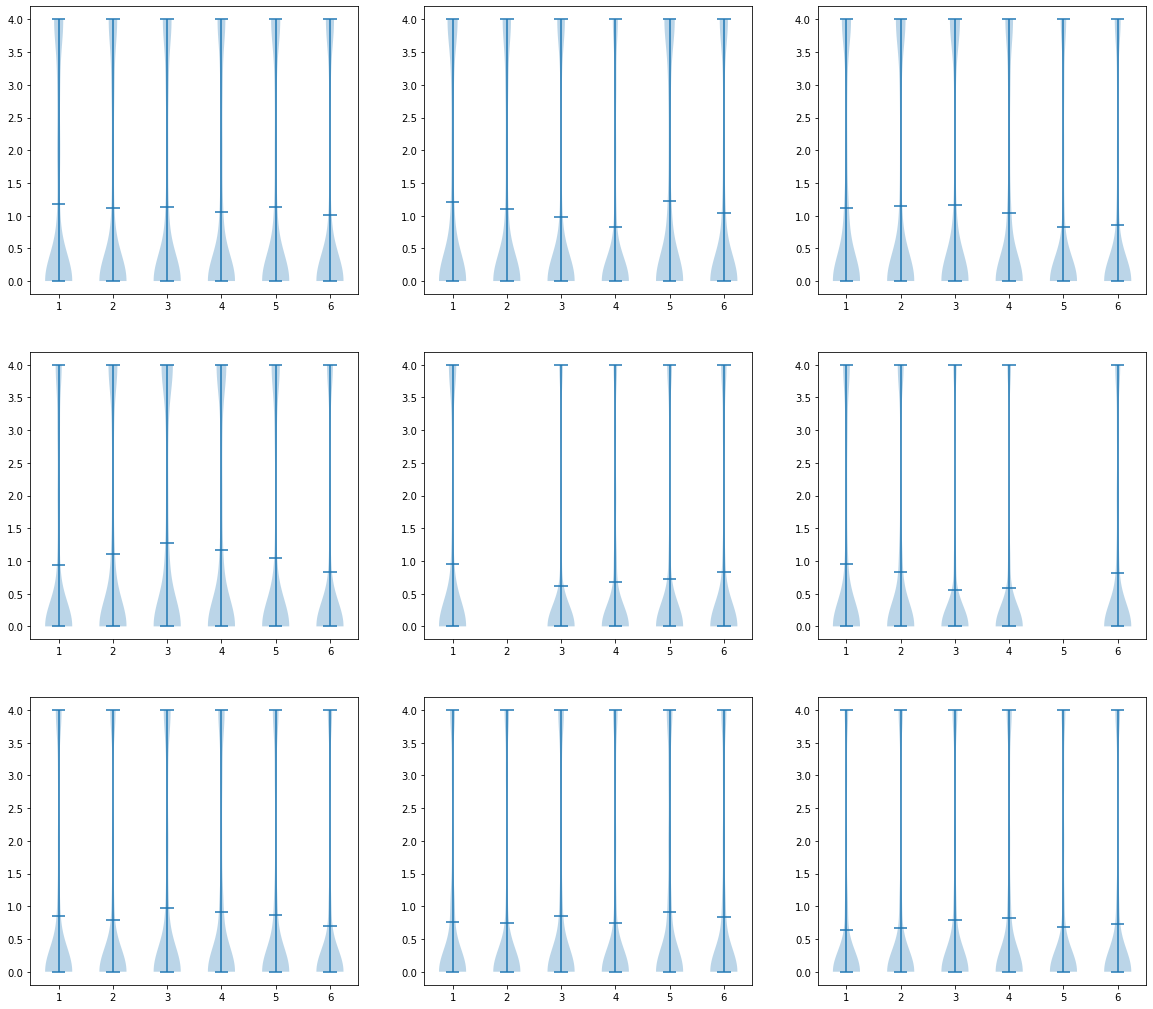


PDV


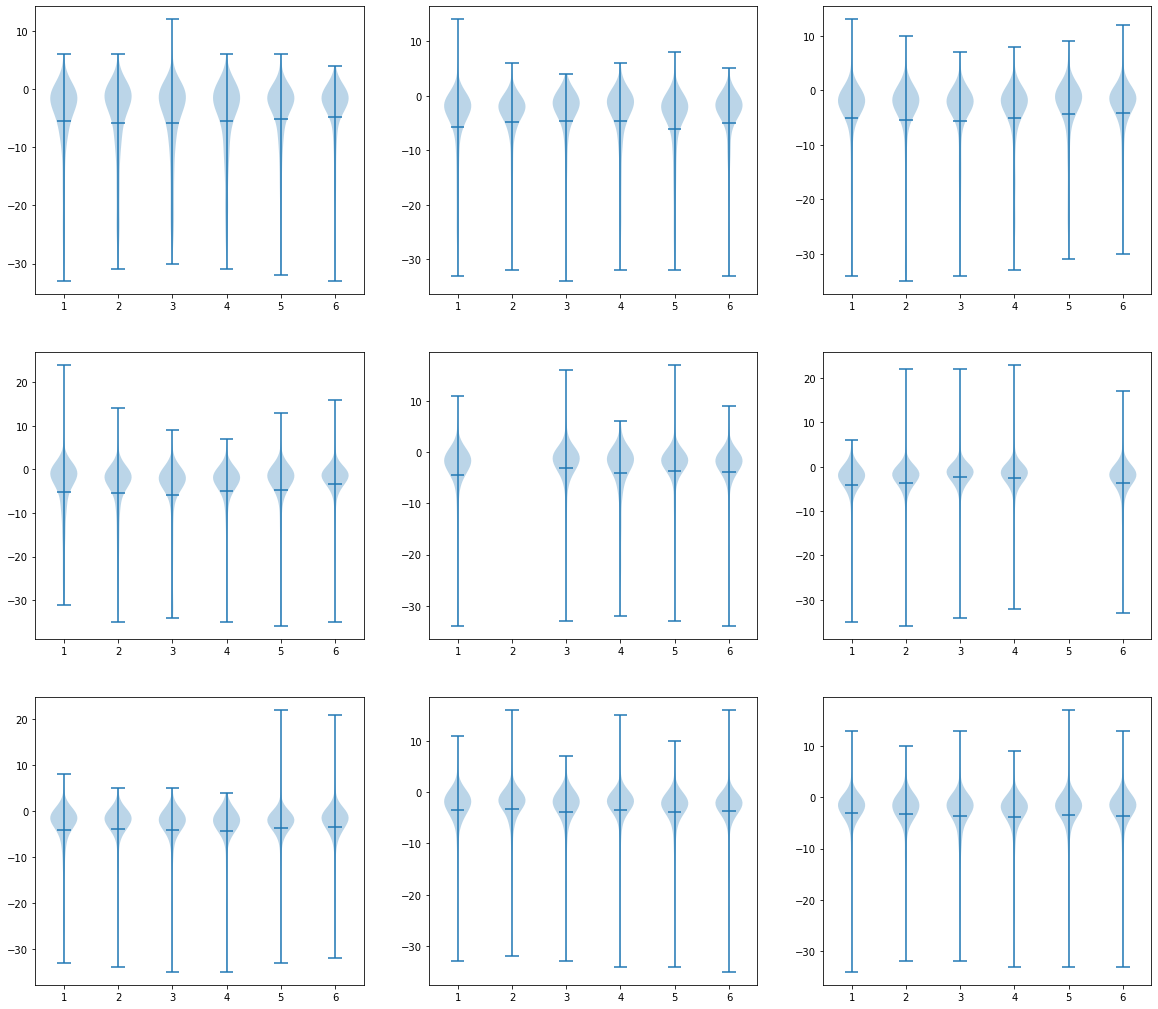


THV


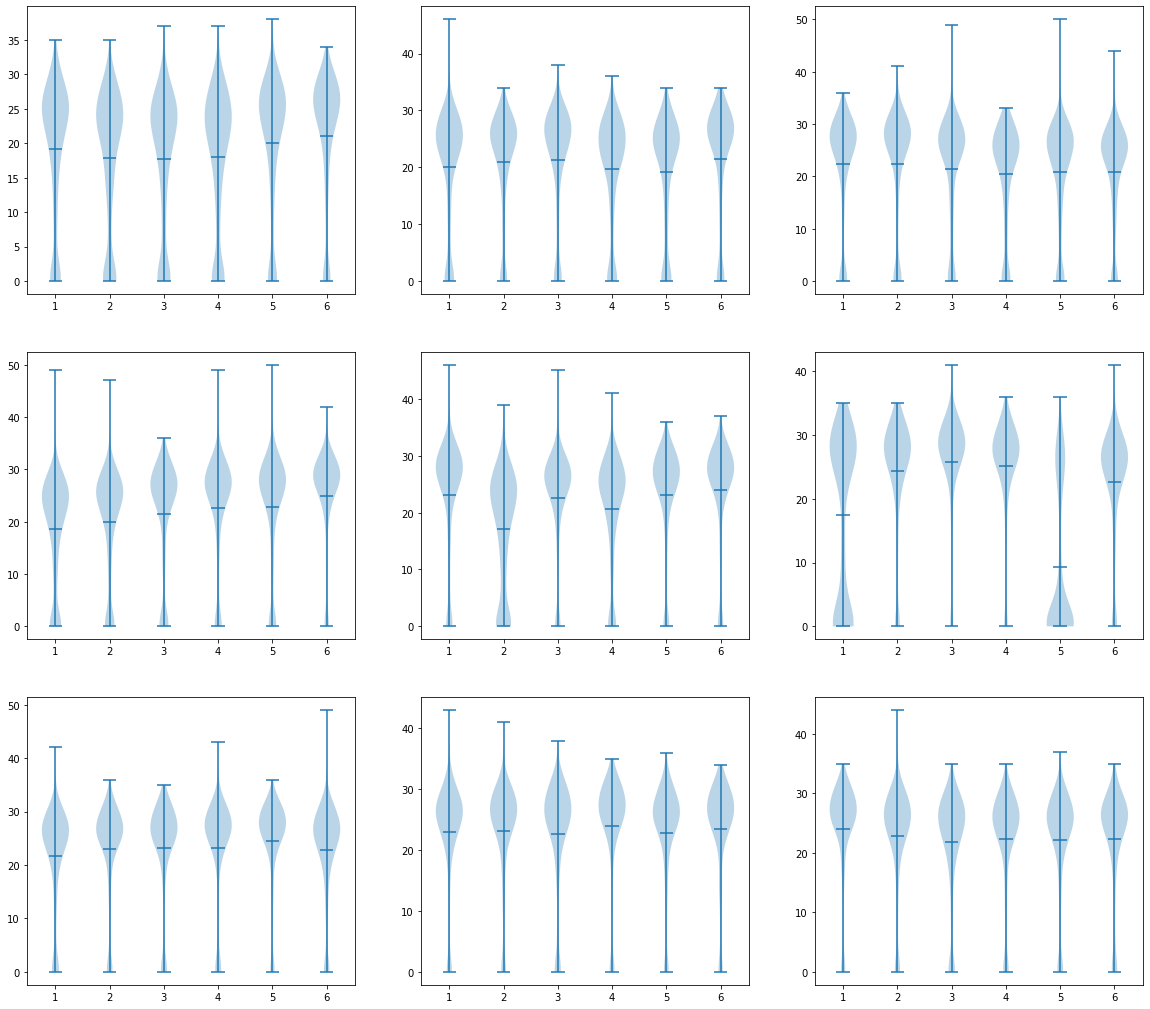


TDP


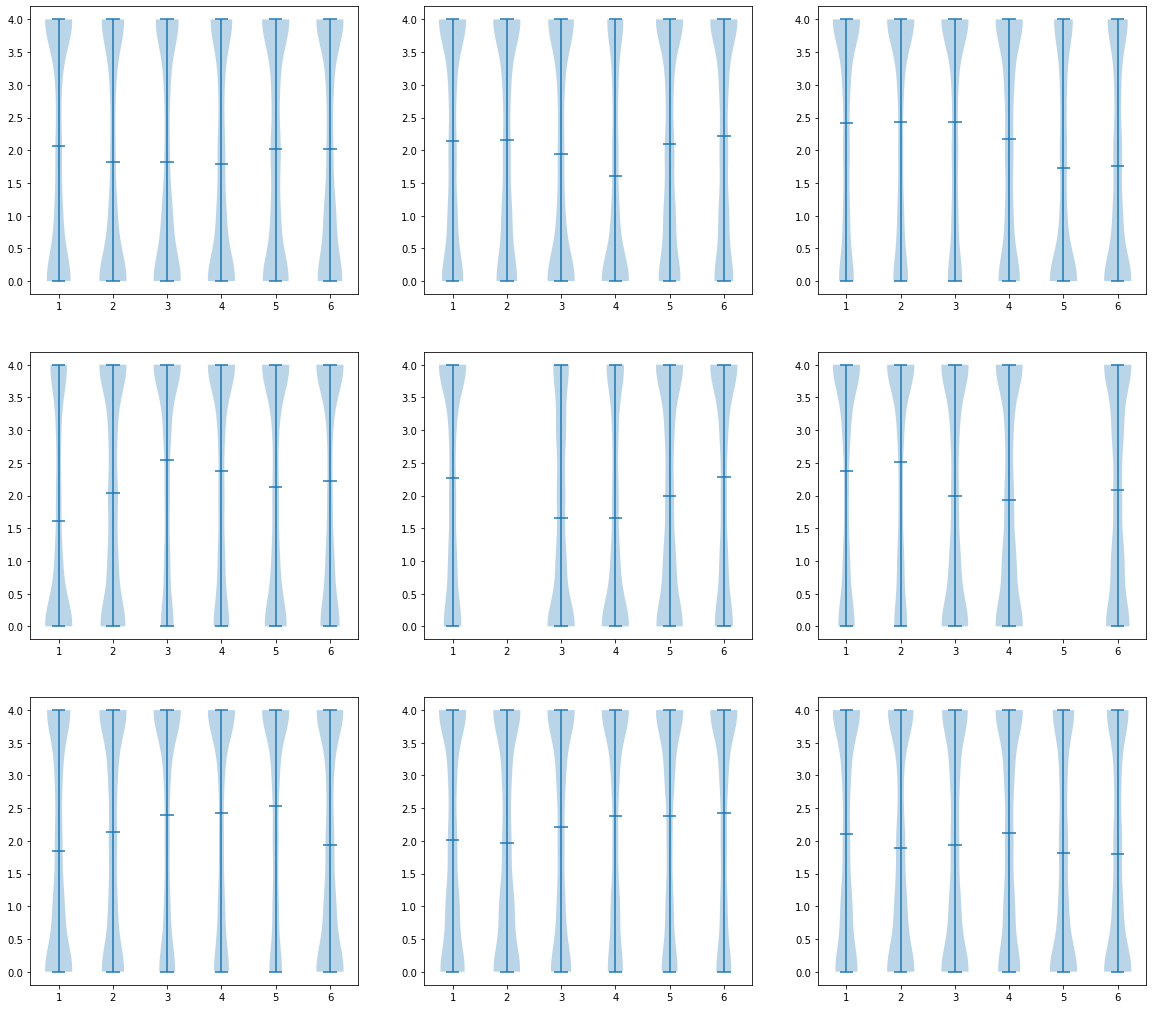


TDV


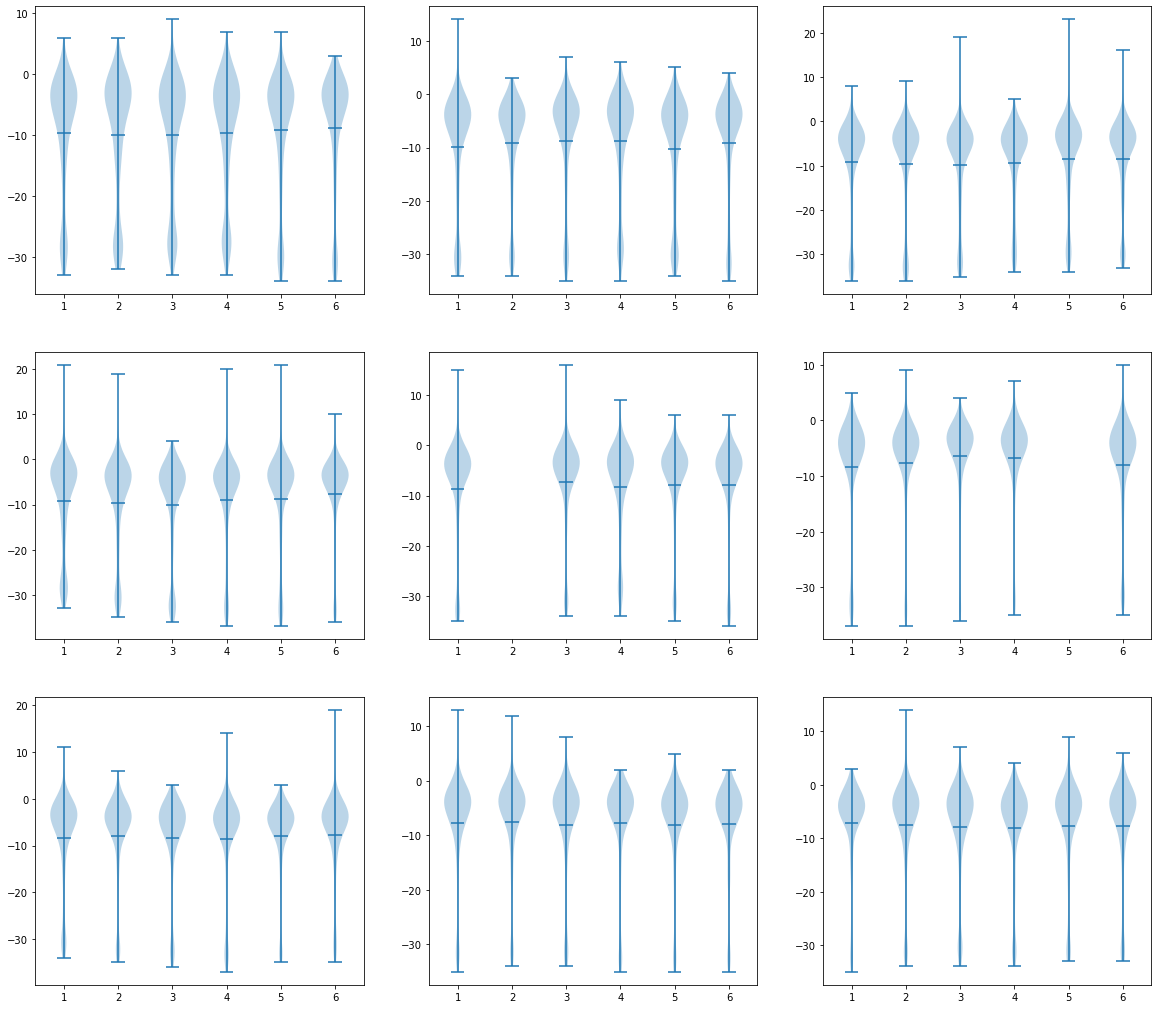

In [42]:
for m in range(len(check_list)):
    print()
    print(check_list[m])
    fig, axs = plt.subplots(3, 3, figsize = (20, 18))
    for k in range(0, 3):
        for i in range(0, 3):
            axs[k, i].violinplot([df_sam2.iloc[:, i] for i in range(17+6*i+18*k+54*m, 17+6*(i+1)+18*k+54*m)], showmeans = True)
    plt.show()